In [2]:
import numpy as np
import matplotlib.pyplot as mtp  
import pandas as pd 

In [3]:
data_set= pd.read_csv(r'C:\Users\Vinod\Desktop\major project\stocks\apple_stocks.csv')  
data_set.dropna(axis='columns')

data_set.fillna(0, inplace=True)
data_set

,Unnamed: 0,Unnamed: 0.1,Date,Open,High,Low,Close,Volume,Trend,Close_10,Future Trend,Total score
0,0,0,20141231,25.611516,25.681889,25.019014,25.057606,165613600,-1,24.249435,-1,202
1,1,1,20150102,25.286885,25.298236,24.369756,24.819241,212818400,-1,24.061016,-1,364
2,2,2,20150105,24.583150,24.664874,23.929355,24.120045,257142000,-1,24.680767,1,269
3,3,3,20150106,24.185883,24.387924,23.752289,24.122320,263188400,-1,24.869184,1,292
4,4,4,20150107,24.335706,24.562718,24.222200,24.460564,160423600,1,25.516169,1,716
...,...,...,...,...,...,...,...,...,...,...,...,...
1158,1158,1158,20190808,49.128691,49.945867,48.929919,49.921326,108038000,1,49.920000,-1,492
1159,1159,1159,20190809,49.586314,49.945955,49.091188,49.509953,98478800,-1,50.860000,1,877
1160,1160,1160,20190812,49.172483,49.771068,49.056707,49.384327,89927600,1,50.290000,1,266
1161,1161,1161,20190813,49.517344,52.256537,49.384323,51.475670,188874000,1,50.630000,-1,571


In [4]:
feature_df = data_set[['Trend','Total score']]


x = np.asarray(feature_df)

y = np.asarray(data_set['Future Trend'])


Text(0, 0.5, 'Stock value and sentiments')

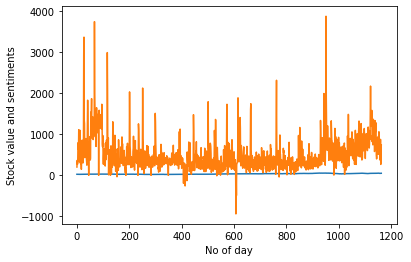

In [5]:
mtp.plot(data_set['Unnamed: 0'],data_set['Open'],data_set['Total score'])
mtp.xlabel("No of day")
mtp.ylabel("Stock value and sentiments")

In [6]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

In [7]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 100, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  
y_pred

array([-1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,
        1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,
        1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1, -1, -1,  1

In [9]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[33,  0, 59],
       [ 1,  0,  0],
       [53,  0, 87]], dtype=int64)

In [10]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5150214592274678
